In [4]:
import pandas as pd 
import datetime, glob, os, warnings;  warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters


In [ ]:
def create_plot(y, x=None, yunits='ng/m$^3$', title="Aethalometer", ytitle='eBC'):
    plt.style.use('ggplot')
    register_matplotlib_converters()
    
    # definitions for the axes
    left, width = 0.1, 0.7
    bottom, height = 0.15, 0.75
    spacing = 0.005
    box_width = 1 - (1.5*left + width + spacing)

    rect_scatter = [left, bottom, width, height]
    rect_box = [left + width + spacing, bottom, box_width, height]

    # start with a rectangular Figure
    today = datetime.strftime(datetime.now(),'%Y%m%d')
    box = plt.figure("boxplot_{}".format(today), figsize=(12, 6))

    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True)
    ax_box = plt.axes(rect_box)
    ax_box.tick_params(direction='in', labelleft=False, labelbottom=False)

    # the scatter plot:
    if x==None:
        ax_scatter.plot(y) # change plot type to scatter to have markers
        tdelta = y.index.max() - y.index.min()
    else:
        ax_scatter.plot(x, y) # change plot type to scatter to have markers
        tdelta = x.max() - x.min()
    ax_scatter.set(xlabel='date', ylabel=ytitle + ' (' + yunits + ')', title=title)
    my_date_formater(ax_scatter, tdelta)

    # now determine nice limits by hand:
    binwidth = 0.25
    lim0 = y.min()
    lim1 = y.max()
    if x==None:
        tlim0 = y.index.min()
        tlim1 = y.index.max()
    else:
        tlim0 = x.min()
        tlim1 = x.max()
    extra_space = (lim1 - lim0)/10
    extra_t = (tlim1 - tlim0)/10
    ax_scatter.set_xlim((tlim0-extra_t, tlim1+extra_t))
    ax_scatter.set_ylim((lim0-extra_space, lim1+extra_space))

    meanpointprops = dict(marker='D')
    ax_box.boxplot(y.dropna(), showmeans=True, meanprops=meanpointprops)
    ax_box.set_ylim(ax_scatter.get_ylim())
    mu = y.mean()
    sigma = y.std()
    text = r'$\mu={0:.2f},\ \sigma={1:.3f}$'.format(mu, sigma)
    ax_box.text(1, lim1 + extra_space/2, text, horizontalalignment="center", verticalalignment="center")
    
    plt.show()
    plt.close()

# 绘图
## 坐标轴（设置日期格式`my_date_formater`）

In [ ]:
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
def my_date_formater(ax, delta):
    if delta.days < 3:
        ax.xaxis.set_major_locator(mdates.DayLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%y'))
        ax.xaxis.set_minor_formatter(mdates.DateFormatter('%H:%M'))
        ax.xaxis.grid(True, which='minor')
        ax.tick_params(axis="x", which="major", pad=15)
        if delta.days < 0.75:
            ax.xaxis.set_minor_locator(mdates.HourLocator())
        if delta.days < 1:
            ax.xaxis.set_minor_locator(mdates.HourLocator((0,3,6,9,12,15,18,21,)))
        else:
            ax.xaxis.set_minor_locator(mdates.HourLocator((0,6,12,18,)))
    elif delta.days < 8:
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
        ax.xaxis.set_minor_formatter(mdates.DateFormatter('%a %d'))
        ax.xaxis.grid(True, which='minor')
        ax.tick_params(axis="x", which="major", pad=15)
        ax.xaxis.set_minor_locator(mdates.DayLocator())
        ax.set(xlabel='date')
    else:
        xtick_locator = mdates.AutoDateLocator()
        xtick_formatter = mdates.AutoDateFormatter(xtick_locator)
        xtick_formatter.scaled[30.] = FuncFormatter(my_days_format_function)
        xtick_formatter.scaled[1.] = FuncFormatter(my_days_format_function)
        ax.xaxis.set_major_locator(xtick_locator)
        ax.xaxis.set_major_formatter(xtick_formatter)
        ax.set(xlabel='date')

def my_days_format_function(x, pos=None):
     x = mdates.num2date(x)
     if pos == 0:
         fmt = '%b %d\n%Y'
     else:
         fmt = '%b %-d'
     label = x.strftime(fmt)
     return label

In [3]:
## 读取2022年4月海上航线数据
def read_ae33_vers1():
    file_dir = './AE33 0409-0426/'
    filemark = 'AE33_AE33-S08-00991_*'
    files = os.listdir(file_dir)
    dt=[]
    for file in glob.glob(file_dir + filemark):
        df = pd.read_table(file,skiprows=8,header=None,sep='\s+')
        dt = dt.append(df)
        # df = df.iloc[:,1:66]
        # df.columns=['Time','Timebase','RefCh1','Sen1Ch1','Sen2Ch1','RefCh2','Sen1Ch2','Sen2Ch2','RefCh3','Sen1Ch3','Sen2Ch3','RefCh4','Sen1Ch4','Sen2Ch4','RefCh5','Sen1Ch5','Sen2Ch5','RefCh6','Sen1Ch6','Sen2Ch6','RefCh7','Sen1Ch7','Sen2Ch7','Flow1','Flow2','FlowC','Pressure(Pa)','Temperature(°C)','BB(%)','ContTemp','SupplyTemp','Status','ContStatus','DetectStatus','LedStatus','ValveStatus','LedTemp','BC11','BC12','BC1','BC21','BC22','BC2','BC31','BC32','BC3','BC41','BC42','BC4','BC51','BC52','BC5','BC61','BC62','BC6','BC71','BC72','BC7','K1','K2','K3','K4','K5','K6','K7']
        # for i in range(len(df)):
        #     df.Time[i]=ymd+df.Time[i]
        #     df.Time[i]=datetime.datetime.strptime(str(df.Time[i]),'%Y%m%d%H:%M:%S')
    return df

read_ae33_vers1()
# df = read_ae33_vers1('20220409')
# for i in range(20220410,20220427,1):
#     df = df.append(read_ae33_vers1(str(i)))
# pd.set_option('display.max_columns', None)#显示所有列
# display(df)

AttributeError: 'NoneType' object has no attribute 'append'

In [ ]:
## 读取2022年5月陆地数据
def read_ae33_vers2(ymd):
    file_dir = './AE33 0511-0529/'
    file_name = file_dir + 'AE33_AE33-S08-00991_'+ ymd + '.dat'
    df = pd.read_table(file_name,skiprows=6,header=None,sep='\s+')
    df = df.iloc[:,1:66]
    df.columns=['Time','Timebase','RefCh1','Sen1Ch1','Sen2Ch1','RefCh2',
                'Sen1Ch2','Sen2Ch2','RefCh3','Sen1Ch3','Sen2Ch3','RefCh4',
                'Sen1Ch4','Sen2Ch4','RefCh5','Sen1Ch5','Sen2Ch5','RefCh6',
                'Sen1Ch6','Sen2Ch6','RefCh7','Sen1Ch7','Sen2Ch7',
                'Flow1','Flow2','FlowC','Pressure(Pa)','Temperature(°C)','BB(%)',
                'ContTemp','SupplyTemp','Status','ContStatus','DetectStatus','LedStatus','ValveStatus','LedTemp',
                'BC11','BC12','BC1','BC21','BC22','BC2','BC31','BC32','BC3','BC41','BC42',
                'BC4','BC51','BC52','BC5','BC61','BC62','BC6','BC71','BC72','BC7','K1','K2','K3','K4','K5','K6','K7']
    for i in range(len(df)):
        df.Time[i]=ymd+df.Time[i]
        df.Time[i]=datetime.datetime.strptime(str(df.Time[i]),'%Y%m%d%H:%M:%S')
    return df
# df1=read_ae33_vers2('20220511') 
# for i in np.linspace(12,29,18):
#     df1 = df1.append(read_ae33_vers2('202205'+str(int(i))))
# # pd.set_option('display.max_columns', None)#显示所有列
# df1 = df1.reset_index(drop=True)
# # display(df1)

In [10]:
def aae(sig1,sig2):# sig1 < sig2, unit:nm
    import numpy as np
    lbd1,lbd2=470,660
    return np.log(sig2/sig1)/np.log(lbd1/lbd2)
def three_sigma(df,var):  # ser1表示传入DataFrame的某一列
    mean_value = df[var].mean()  # 求平均值
    std_value = df[var].std()  # 求标准差
    rule = (mean_value - 3 * std_value > df[var]) | (mean_value + 3 * std_value < df[var])
    # 位于（u-3std,u+3std）区间的数据是正常的，不在这个区间的数据为异常的
    # 一旦发现有异常值，就标注为True，否则标注为False
    # index = np.arange(df.shape[0])[rule]  # 返回异常值的位置索引
    df2 = df.drop(df[var][rule].index)# 获取非异常数据
    return df2


In [4]:
## 对BC2和BC5进行3sigma异常值清洗，以便求取AAE
# df_aae = three_sigma(df,'BC2')
# df_aae = three_sigma(df,'BC5')
## 对BC6进行3sigma异常值清洗，以便求取880nm下的BC浓度
# df_bc6 = three_sigma(df,'BC6')

In [11]:
aae=aae(df['BC2']/1000,df['BC5']/1000)
bc6=df['BC6']/1000 # 880nm, 单位转换: ng/m3->μg/m3

接着，读取船上气象仪数据

In [12]:
def read_routell(date):
    import warnings;warnings.filterwarnings('ignore')
    ll_dir = 'E:/programming/code_2022_5/route/经纬度走行气象数据/'
    df = pd.read_table(ll_dir+date+'.TXT',sep=',',header=None,usecols=range(0,30))
    pd.set_option('display.max_columns', None)
    df.columns=['output_mark','Time','0W1Bj','lat','SN','lon','EW',
                'speed_GPS','orient_GPS','GPS_situa',
                'speed_zhenFeng','speed_source','speed_valid',
                'orient_zhenFeng','orient_source','orient_valid',
               'speed_relative','orient_relative','speed_true','orient_true',
               'speed_true_1min','orient_true_1min','speed_true_10min','orient_true_10min',
               'press','press_1min','temp','temp_1min','rh','rh_1min']
    return df
df_cru = read_routell('20220410')
df_cru=df_cru.append(read_routell('20220411'))
df_cru=df_cru.append(read_routell('20220412'))
df_cru=df_cru.append(read_routell('20220413'))
df_cru=df_cru.append(read_routell('20220414'))
df_cru=df_cru.append(read_routell('20220415'))
df_cru=df_cru.append(read_routell('20220416'))
df_cru=df_cru.append(read_routell('20220417'))
df_cru=df_cru.append(read_routell('20220418'))
df_cru=df_cru.append(read_routell('20220419'))
df_cru=df_cru.append(read_routell('20220420'))
df_cru=df_cru.append(read_routell('20220421'))
df_cru=df_cru.append(read_routell('20220422'))
df_cru=df_cru.append(read_routell('20220423'))
df_cru=df_cru.append(read_routell('20220424'))
df_cru=df_cru.append(read_routell('20220425'))
df_cru=df_cru.append(read_routell('20220426'))
# pd.set_option('display.max_rows', None)    #显示所有行
df_cru = df_cru.reset_index()
# display(df_cru)

In [13]:
## 清除：船用气象仪中经纬度出现异常的数据
df_cru = df_cru[df_cru['lon']!='XXXXX.XXXX']
df_cru = df_cru.reset_index()

In [14]:
## 处理：船用气象仪中经纬度的表示方式，使之变得规范，方便接下来的处理
lon=df_cru['lon'].astype('float')//100+df_cru['lon'].astype('float')/100%1*100/60
df_cru['lon']=np.array(lon)
lat=df_cru['lat'].astype('float')//100+df_cru['lat'].astype('float')/100%1*100/60
df_cru['lat']=np.array(lat)

In [15]:
del lon,lat

然后，将BC6和船用气象仪两组数据，按照时间进行合并

In [16]:
## 首先，调整：船用气象仪时间戳为正常格式
for i in range(len(df_cru)):
        df_cru.Time[i]='20'+str(df_cru.Time[i])
        df_cru.Time[i]=datetime.datetime.strptime(str(df_cru.Time[i]),'%Y%m%d%H%M%S')

In [17]:
## 其次，取船用气象仪数据中的整点数据

df_cru_oclo = df_cru[df_cru.Time.apply(lambda x:x.minute==0 and x.second==0)]

In [18]:
## 合并

df_combine = pd.merge(df_cru_oclo,df,on='Time')

## BC 和 AAE 的填色图 

首先，设定背景底图参数

In [19]:
from cartopy.io.shapereader import Reader
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
shp_dir='E:/official_shapefiles/'
shp_name='continents_lines.shp'
proj=ccrs.PlateCarree()

def set_geo(ax):
    import cartopy.feature as cf
    shp = cf.ShapelyFeature(Reader(shp_dir+shp_name).geometries(), ccrs.PlateCarree())
    # proj=ccrs.LambertConformal()
    extent=[110,130,24, 38]
    ax.set_extent(extent, crs=proj) 
    ax.add_feature(shp,  linewidth=0.4, edgecolor='black', facecolor='none',alpha=0.5,zorder=4)
    #------------------------------------------------------------------------------------------------------------------------------------
#     lb=ax.gridlines(draw_labels=None, xlocs=range(122,126,1), ylocs=range(25,33,1), linestyle=(0,(10,10)),
#                     linewidth=0.25, color='dimgrey', alpha=0.8, zorder=4)
    lb=ax.gridlines(draw_labels=True,x_inline=False, y_inline=False,xlocs=range(115,130,5), ylocs=range(26,38,2),
                    linewidth=0.1, color='gray', alpha=0.8, linestyle='--',zorder=11)
    lb.top_labels = None
    lb.right_labels = None
    lb.rotate_labels = False

In [24]:
## 绘制BC沿航迹的浓度分布图
def plot_route():
    import matplotlib.pyplot as plt
    plt.rcParams['axes.unicode_minus'] = False 
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    fig = plt.figure(figsize=(8, 4))
    ax = plt.axes(projection=proj)
    ax.set_global()
    set_geo(ax)

#     ax.plot(df_combine.lon,df_combine.lat,
#            linewidth=0.5,color='black',zorder=1,label='obs point')
    scatter=ax.scatter(df_combine.lon,df_combine.lat,
             s=2.5,
        #    s=df_combine.temp_1min,# 1分钟平均气温，单位：摄氏度
           c=df_combine.BC6/1000,# 880nm, 单位转换: ng/m3->μg/m3
        #    vmin=df_combine.BC6.min()/1000, vmax=df_combine.BC6.max()/1000,
           cmap=plt.cm.binary,alpha=0.7,zorder=3)

    
    legend1 = ax.legend(*scatter.legend_elements(num=6),
                    loc="upper left", ncol=2,
                    title="$\mathrm{BC}_{880} /\mu g \cdot m^{-3}$")
    ax.add_artist(legend1)

    # handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
    # legend2 = ax.legend(handles, labels, loc="lower right", title="Temp_ave_1min")


    plt.savefig('BC6_in_route_20220705.png',format='png',dpi=600)

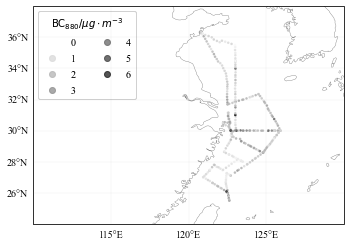

In [25]:
plot_route()

## 折线图

In [ ]:
print(len(df_w))
np.isinf(aae(df_w['BC2']/1000,df_w['BC5']/1000)).any()
def baseset_aae(ax,ytick,df):
    from matplotlib.dates import DateFormatter
    AAE = aae(df['BC2']/1000,df['BC5']/1000)
    mu=np.nanmean(~np.isinf(AAE))
    median=AAE.median()
    sigma=np.nanstd(~np.isnan(AAE))
    textstr = '\n'.join((
    r'$\mu=%.4f$' % (mu, ),
    r'$\mathrm{median}=%.4f$' % (median, ),
    r'$\sigma=%.4f$' % (sigma, )))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
    ax.text(0.7,0.05,textstr, transform=ax.transAxes, fontsize=14)
    ax.axhline(y=AAE.median(), c='black',ls='--', lw=1)
    ax.set_ylabel("$\mathrm{AAE}_{470-660}$")
    # ax.set_yticks(ytick)
    ax.set_xlabel('date(month-day)')
    ax.legend()
def plot_aae():
    import matplotlib.pyplot as plt
#     import matplotlib.dates as mdates
#     from matplotlib.pyplot import MultipleLocator
    plt.rcParams['axes.unicode_minus'] = False 
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    fig,(ax,ax1) = plt.subplots(2,1,sharey=True, facecolor='w',figsize=(8,6.5))

    ax.plot(df_w.Time,aae(df_w['BC2']/1000,df_w['BC5']/1000)#单位转换：ng/m3->μg/m3
            ,label='cruise')
    ax1.plot(df1_w.Time,aae(df1_w['BC2']/1000,df1_w['BC5']/1000)
            ,label='Nuist')

    baseset_aae(ax,np.linspace(-2,3,6),df_w)
    baseset_aae(ax1,np.linspace(-4,4,5),df1_w)
    plt.savefig('aae_20220605.png',dpi=600,bbox_inches='tight',pad_inches=0)
plot_aae()    

In [ ]:
def baseset_bc(ax,df):# BC6(880nm)
    from matplotlib.dates import DateFormatter
    bc = df['BC6']/1000#单位转换：ng/m3->μg/m3
    mu=np.nanmean(bc)
    median=bc.median()
    sigma=np.nanstd(bc)
    textstr = '\n'.join((
    r'$\mu=%.4f$' % (mu, ),
    r'$\mathrm{median}=%.4f$' % (median, ),
    r'$\sigma=%.4f$' % (sigma, )))
    ax.xaxis.set_major_formatter(DateFormatter('%m-%d'))
    ax.text(0.7,0.05,textstr, transform=ax.transAxes, fontsize=14)
    ax.axhline(y=bc.median(), c='black',ls='--', lw=1)
    ax.set_ylabel("$\mathrm{BC}_{880}(\mu g\cdot m^{-3})$")#单位转换：ng/m3->μg/m3
    # ax.set_yticks(ytick)
    ax.set_xlabel('date(month-day)')
    ax.legend()
def plot_bc():# BC6(880nm)
    import matplotlib.pyplot as plt
    plt.rcParams['axes.unicode_minus'] = False 
    plt.rcParams['font.sans-serif'] = ['Times New Roman']
    fig,(ax,ax1) = plt.subplots(2,1,sharey=True, facecolor='w',figsize=(8,6.5))

    ax.plot(df_w.Time,df_w['BC6']/1000,label='cruise')
    ax1.plot(df1_w.Time,df1_w['BC6']/1000,label='Nuist')

    baseset_bc(ax,df_w)
    baseset_bc(ax1,df1_w)
    plt.savefig('bc_20220605.png',dpi=600,bbox_inches='tight',pad_inches=0)
plot_bc()    